In [25]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

Input Data and Shape
(3000, 2)


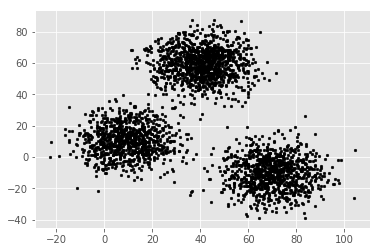

In [2]:
# Importing the dataset

data = pd.read_csv('dummy.csv')

print("Input Data and Shape")

print(data.shape)

data.head()



# Getting the values and plotting it

f1 = data['V1'].values

f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

C:\Users\Mukesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


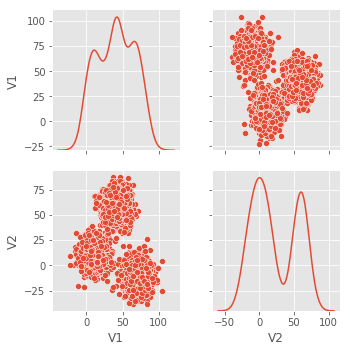

In [27]:
sns.pairplot(data, diag_kind ='kde')

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Let us check optimal number of clusters-
distortion = []

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(X, clusters.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])

  # cdist computes distance between records of X and cluster_centers using euclidian method above
  # since we are using euclidian, it will do (xi - xbar)^2 for every record in X in all dimensions and add underroot to get dist
  # It will assign a given record to that cluster whos distance is min
  # Sum up all the distances between data points and their cluster centers and append that to distortions array
  # Distortions is the total spread among data points in all clusters put together
  # Distortions will be 0 when each data point is a cluster but that is not useful to extract any information
  # Distortion is another measure of spread, equivalent to intertia


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]



,cluster_errors,num_clusters
0,5.030433e+06,1
1,2.309985e+06,2
2,6.116059e+05,3
3,5.361875e+05,4
4,4.695555e+05,5
5,4.183896e+05,6
6,3.609791e+05,7
7,3.120754e+05,8
8,2.716844e+05,9


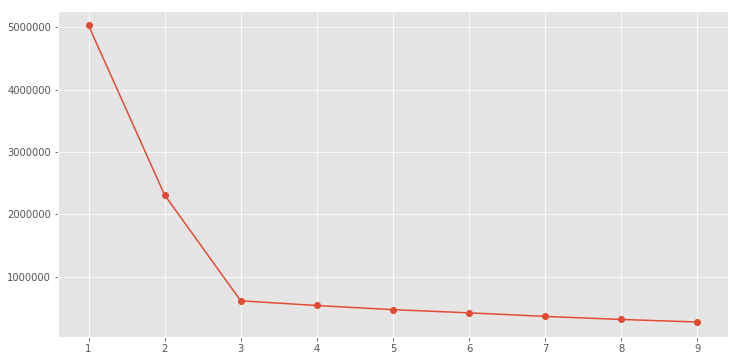

In [4]:
# Elbow plot, Scree Plot


plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

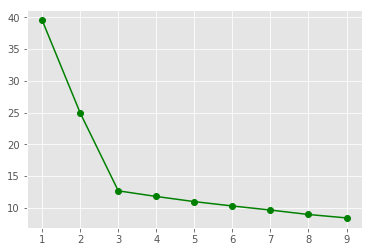

In [5]:
plt.plot(range(1,10), distortion, 'go-')

In [20]:


# Number of clusters

kmeans = KMeans(n_clusters=5)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[  9.36565207  10.70099062]
 [ 78.48441403 -11.19762006]
 [ 31.72845157  60.91287817]
 [ 47.92883572  58.70177283]
 [ 61.79941006  -9.0665603 ]]


In [21]:
colnames = ["col1", "col2"]
prediction= kmeans.predict(X)  #Using the KMeans cluster object to assign cluster_id to each record in X.
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction  # Store the cluster id into a new "group" column


X_df.tail(50)

,col1,col2,group
2950,71.53534,0.862379,4
2951,76.21033,7.055012,1
2952,63.84636,-17.728300,4
2953,66.25222,-3.913034,4
2954,81.44768,-24.247570,1
2955,62.67937,-20.088210,4
2956,54.33532,1.649464,4
2957,75.66274,-15.758750,1
2958,80.03555,-14.611740,1
2959,60.50964,-18.805880,4


In [22]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 3), dtype=float64)

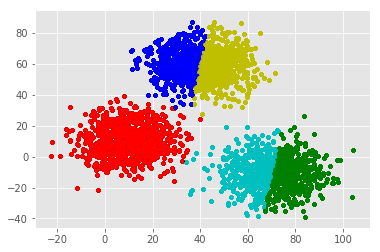

In [23]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9B55FD5F8>,
      dtype=object)

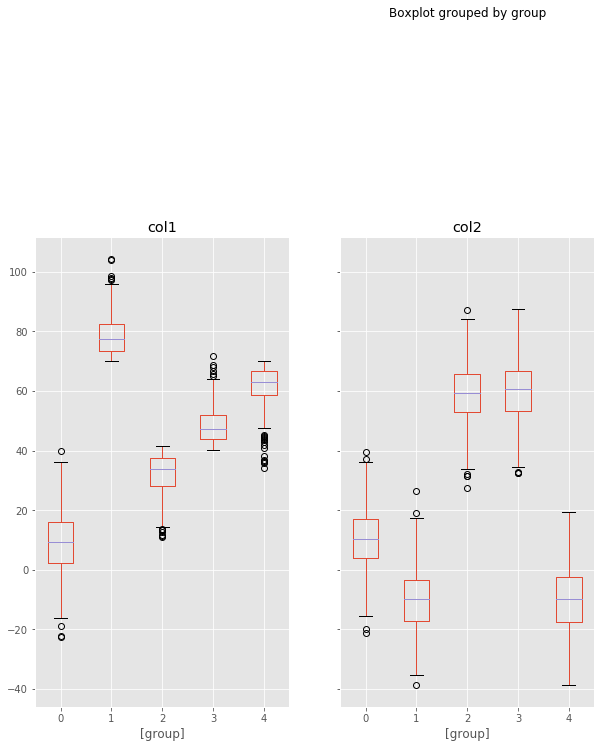

In [21]:
import matplotlib.pylab as plt

X_df.boxplot(by = 'group',  layout=(4,3), figsize=(15, 40))
